# Models comparison

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
!pip install ensemble-boxes

In [9]:
!pip install ultralytics==8.2.0 torch==2.3.0 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.2/779.2 MB 791.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 737.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [53]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO
import torch

# Konfiguracja ścieżek i parametrów
MODEL_PATHS = {
    'YOLOv8_exp1': '/content/models/exp1/weights/best.pt',
    'YOLOv8_exp3': '/content/models/exp3/weights/best.pt',
    'YOLOv11_exp2': '/content/models/exp2/weights/best.pt'
}

RESULTS_PATHS = {
    'YOLOv8_exp1': '/content/models/exp1/results.csv',
    'YOLOv8_exp3': '/content/models/exp3/results.csv',
    'YOLOv11_exp2': '/content/models/exp2/results.csv'
}

In [54]:
def safe_model_analysis(model_path):
    """Analizuje model i zwraca jego statystyki."""
    try:
        model = YOLO(model_path)
        info = model.info()

        return {
            'parameters': info[1],  # Ilość parametrów
            'flops': info[3],  # FLOPs
            'file_size': os.path.getsize(model_path) / (1024*1024)  # Rozmiar w MB
        }
    except Exception as e:
        print(f'Błąd analizy modelu {model_path}: {str(e)}')
        return None

def analyze_results(csv_path):
    """Analizuje plik results.csv i zwraca najlepsze metryki walidacyjne."""
    if not os.path.exists(csv_path):
        print(f"Brak pliku results.csv: {csv_path}")
        return None

    try:
        df = pd.read_csv(csv_path)
        best_metrics = {
            'mAP50': df['metrics/mAP50(B)'].max(),
            'mAP50-95': df['metrics/mAP50-95(B)'].max(),
            'precision': df['metrics/precision(B)'].max(),
            'recall': df['metrics/recall(B)'].max(),
        }
        return best_metrics
    except Exception as e:
        print(f"Błąd odczytu {csv_path}: {e}")
        return None

def compare_models(model_paths, results_paths):
    """Porównuje modele na podstawie ich cech i metryk."""
    results = []

    for name, path in model_paths.items():
        if not os.path.exists(path):
            print(f"Brak pliku modelu: {path}")
            continue

        model_info = safe_model_analysis(path)
        metrics = analyze_results(results_paths[name])

        if model_info and metrics:
            results.append({
                'Model': name,
                'Parametry (M)': model_info['parameters'] / 1e6,
                'GFLOPs': model_info['flops'] / 1e9,
                'Rozmiar (MB)': model_info['file_size'],
                'mAP50': metrics['mAP50'],
                'mAP50-95': metrics['mAP50-95'],
                'Precision': metrics['precision'],
                'Recall': metrics['recall'],
            })

    return pd.DataFrame(results)

# Wizualizacja wyników
def plot_results(df):
    fig, ax = plt.subplots(1, 2, figsize=(20, 8))

    # Wykres słupkowy metryk
    df.set_index('Model')[['mAP50', 'mAP50-95', 'Precision', 'Recall']].plot(kind='bar', ax=ax[0])
    ax[0].set_title('Porównanie dokładności modeli')

    # Wykres złożoności
    ax[1].scatter(df['GFLOPs'], df['Parametry (M)'], s=df['Rozmiar (MB)']*50, alpha=0.6)
    ax[1].set_xlabel('GFLOPs')
    ax[1].set_ylabel('Parametry (M)')
    ax[1].set_title('Złożoność modeli')

    for i, row in df.iterrows():
        ax[1].annotate(row['Model'], (row['GFLOPs'], row['Parametry (M)']))

    plt.tight_layout()
    plt.savefig('/content/comparison.png')
    plt.close()

In [55]:
# Uruchomienie analizy
torch.multiprocessing.freeze_support()

df = compare_models(MODEL_PATHS, RESULTS_PATHS)

if not df.empty:
    print("\nPodsumowanie:")
    print(df)
    plot_results(df)
    print("\nWykres zapisano w: /content/comparison.png")

    # Wnioski:
    best_model = df.sort_values(by='mAP50-95', ascending=False).iloc[0]
    print(f"\nNajlepszy model pod względem mAP50-95: {best_model['Model']} "
          f"(mAP50-95={best_model['mAP50-95']:.3f}, precision={best_model['Precision']:.3f}, recall={best_model['Recall']:.3f})")
else:
    print("Brak danych do analizy. Sprawdź ścieżki do modeli!")

Model summary: 129 layers, 3,012,018 parameters, 0 gradients, 8.2 GFLOPs
Model summary: 129 layers, 3,012,018 parameters, 0 gradients, 8.2 GFLOPs
YOLO11n summary: 181 layers, 2,591,010 parameters, 0 gradients, 6.4 GFLOPs

Podsumowanie:
          Model  Parametry (M)        GFLOPs  Rozmiar (MB)    mAP50  mAP50-95  \
0   YOLOv8_exp1       3.012018  8.199526e-09      5.948703  0.72951   0.49638   
1   YOLOv8_exp3       3.012018  8.199526e-09      5.955295  0.72493   0.49281   
2  YOLOv11_exp2       2.591010  6.445978e-09      5.203998  0.72596   0.48685   

   Precision   Recall  
0    0.82388  0.68923  
1    0.82177  0.69044  
2    0.80150  0.68621  

Wykres zapisano w: /content/comparison.png

Najlepszy model pod względem mAP50-95: YOLOv8_exp1 (mAP50-95=0.496, precision=0.824, recall=0.689)


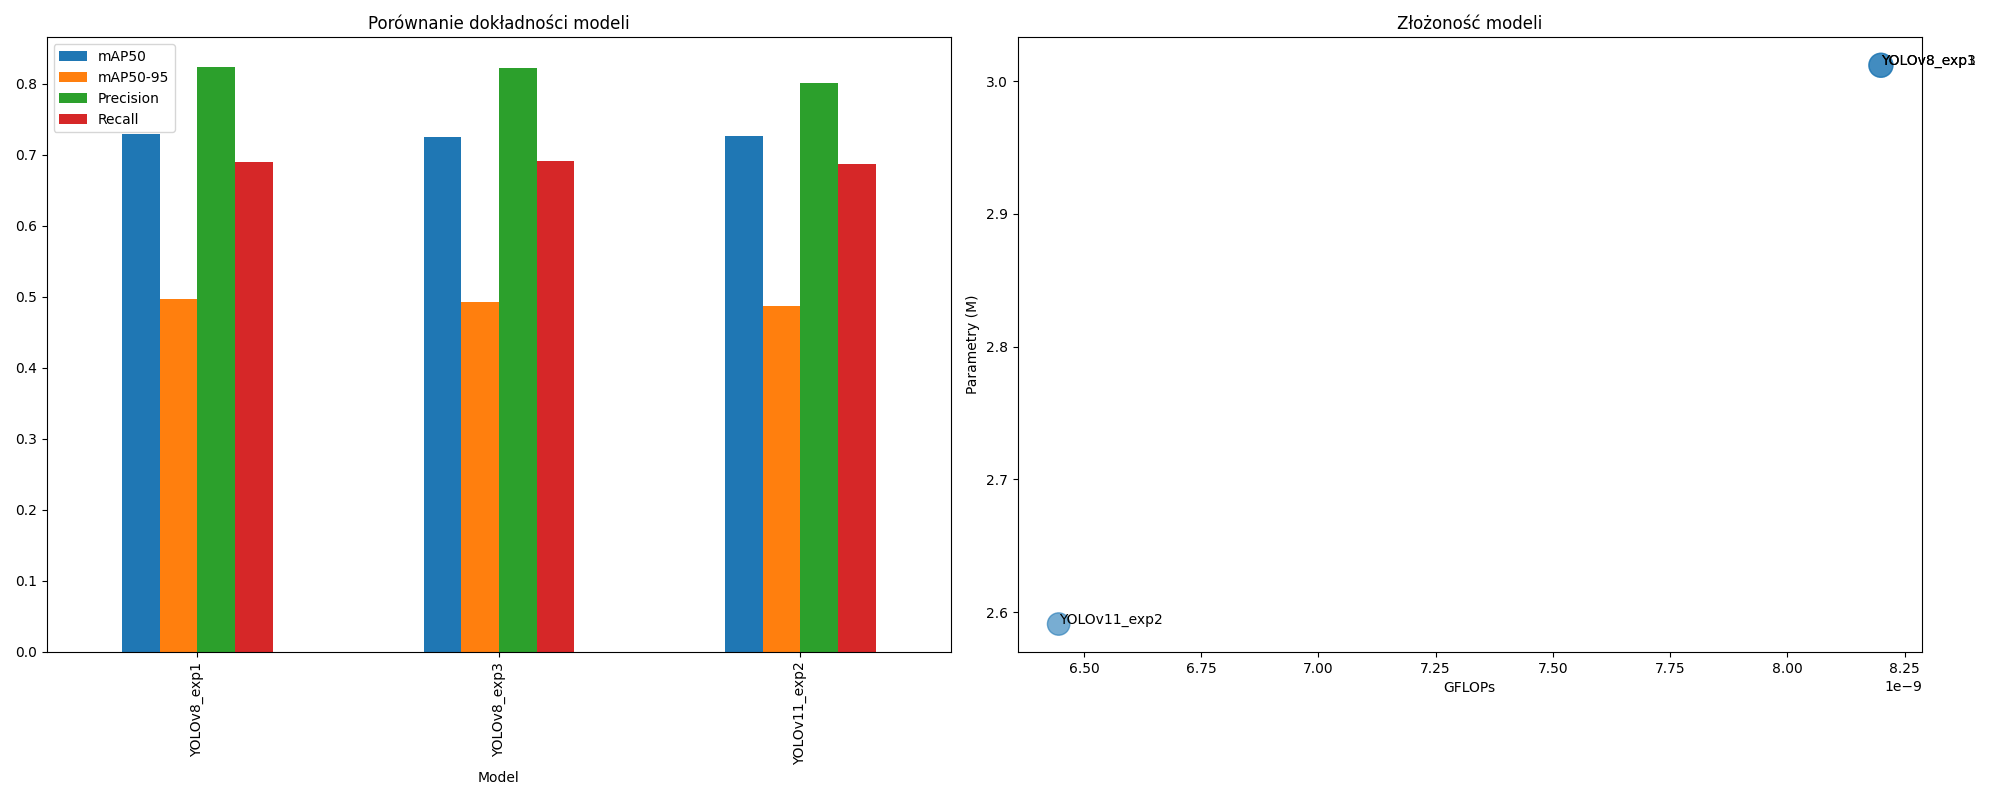